In [1]:
 #importing all the modules
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

from glob import glob

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
sounds=("/kaggle/input/audio-cats-and-dogs/cats_dogs/train")

In [3]:
sound_test=('/kaggle/input/audio-cats-and-dogs/cats_dogs/test')

In [4]:
import tensorflow as tf
# get the train files
file_train = tf.io.gfile.glob(sounds + '/*/*')
# shuffle 
file_train = tf.random.shuffle(file_train)

train_list = file_train.numpy().astype(str)
# Print the number of training files
print("Number of training files:", len(file_train))

Number of training files: 210


In [5]:
#get the test files
file_test = tf.io.gfile.glob(sound_test + '/*/*')
# shuffle 
file_test = tf.random.shuffle(file_test)

test_list = file_test.numpy().astype(str)
# Print the number of training files
print("Number of training files:", len(file_test))

Number of training files: 67


In [6]:
# Prepare lists to hold labels and paths
labels = []
paths = []


for animal_path in train_list:
    
    animal = os.path.basename(os.path.dirname(animal_path))
    
    # Append the label and file path to the respective lists
    labels.append(animal)
    paths.append(animal_path)
# Create a DataFrame from the lists
data_df = pd.DataFrame({
    'label': labels ,
    'path': paths
})

# Define a mapping from emotion codes to labels
animal_labels = {
    'cat':'0', 'dog':'1'}

# Replace animals to numbers 
data_df['label'] =data_df['label'].map(animal_labels)



In [7]:
# Prepare lists to hold labels and paths
labels1= []
paths1= []


for animal_path in test_list:
    
    animal = os.path.basename(os.path.dirname(animal_path))
    
    # Append the label and file path to the respective lists
    labels1.append(animal)
    paths1.append(animal_path)
# Create a DataFrame from the lists
df = pd.DataFrame({
    'label': labels1,
    'path': paths1
})

# Define a mapping from emotion codes to labels
animal_labels = {
    'cats':0,'test':'1'}

# Replace animals to numbers 
df['label'] =df['label'].map(animal_labels)



In [8]:
# Display the DataFrame
print("DataFrame preview:")
print(data_df.head())

# Optionally, display the number of samples for each label
print("\nCount of each label:")
print(data_df['label'].value_counts())

DataFrame preview:
  label                                               path
0     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/tr...
1     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/tr...
2     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/tr...
3     1  /kaggle/input/audio-cats-and-dogs/cats_dogs/tr...
4     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/tr...

Count of each label:
label
0    125
1     85
Name: count, dtype: int64


In [9]:
# Display the DataFrame
print("DataFrame preview:")
print(df.tail())

# Optionally, display the number of samples for each label
print("\nCount of each label:")
print(df['label'].value_counts())

DataFrame preview:
   label                                               path
62     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/te...
63     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/te...
64     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/te...
65     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/te...
66     0  /kaggle/input/audio-cats-and-dogs/cats_dogs/te...

Count of each label:
label
0    39
1    28
Name: count, dtype: int64


In [10]:
data_df.to_csv("data_path.csv",index=False)

In [11]:
df.to_csv('test_path.csv',index=False)

In [12]:
print(data_df.label.value_counts())

label
0    125
1     85
Name: count, dtype: int64


In [13]:
print(df.label.value_counts())

label
0    39
1    28
Name: count, dtype: int64


**Data Visualization**

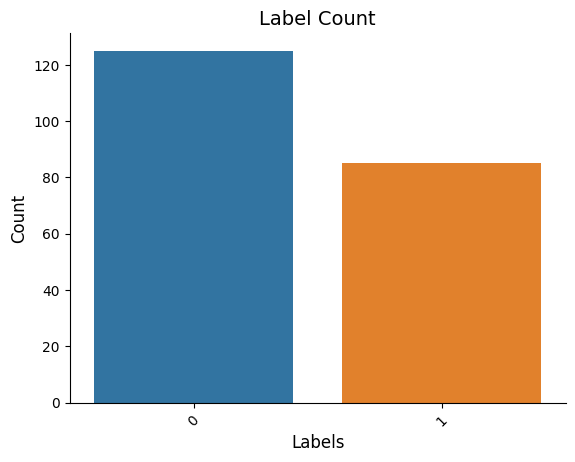

In [14]:
import seaborn as sns
plt.title('Label Count', size = 14)
filtered_final_df = data_df[data_df['label']!='Unknown']

sns.countplot(data = filtered_final_df , x = 'label')
plt.xlabel('Labels',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
plt.xticks(rotation = 45)

plt.show()

In [15]:
# creating functions to display the plots 

def waveplot_creation(data , sr , label):
    plt.figure(figsize = (10,4))
    plt.title(f"{label} Waveplot")
    
    librosa.display.waveshow(data , sr = sr)
    
    

def spectrogram_creation(data , sr , label):
    plt.figure(figsize=(12,3))
    plt.title(f"{label} Spectogram")
    
   
    S = librosa.stft(data) # short-time fourier transform
    Sdb = librosa.amplitude_to_db(S)
    
    librosa.display.specshow(Sdb , sr = sr ,  x_axis ='time' , y_axis = 'hz' )
    plt.colorbar()
    plt.tight_layout()

def melspectrogram_creation(data , sr , label):
    plt.figure(figsize=(12,3))
    plt.title(f"{label} Mel Spectrogram")
    
    MS = librosa.feature.melspectrogram(y = data , sr=sr)
    MSdb = librosa.power_to_db(MS)
    
    librosa.display.specshow(MSdb , sr = sr , x_axis ='time' , y_axis = 'mel' , cmap = 'viridis')
    plt.colorbar()
    plt.tight_layout()

/tmp/ipykernel_6101/927605778.py:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sdb = librosa.amplitude_to_db(S)


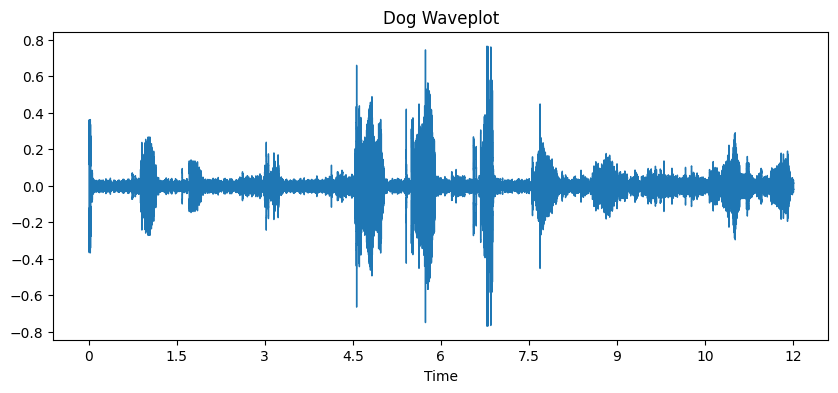

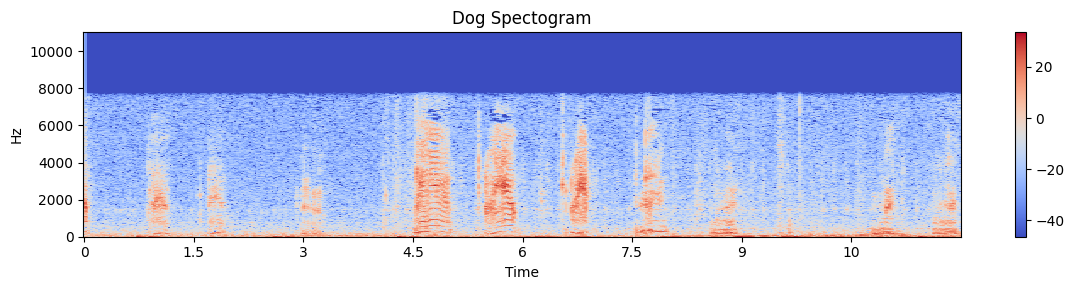

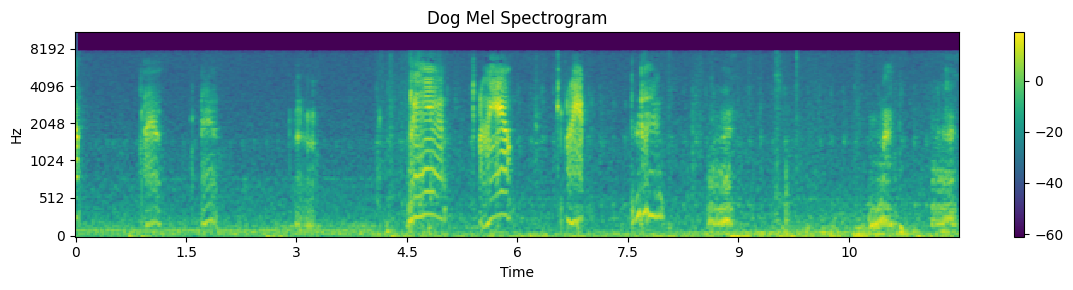

In [16]:
# to play the audio files
from IPython.display import Audio

label='Dog'

path = np.array(data_df.path)[2]
data , sampling_rate = librosa.load(path)

#invocation
waveplot_creation(data , sampling_rate , label)
spectrogram_creation(data , sampling_rate , label)
melspectrogram_creation(data , sampling_rate , label)

Audio(path)

**Data Augmentation**

In [17]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data 
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching 
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
    
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)



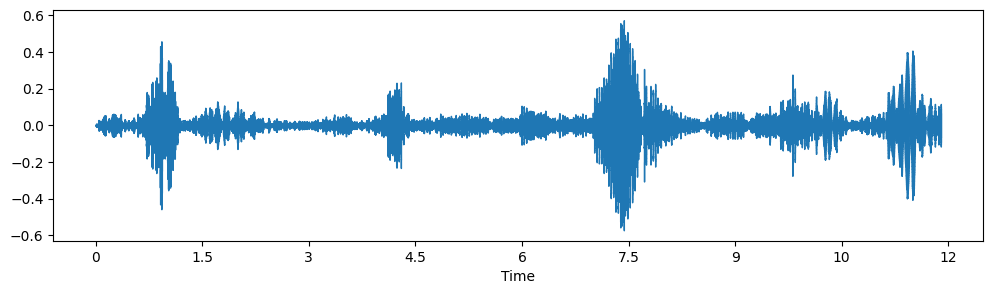

In [18]:
path = np.array(data_df.path)[7]
data , sampling_rate = librosa.load(path)
plt.figure(figsize = (12,3))
librosa.display.waveshow(y=data , sr = sampling_rate)

Audio(path)

Noise Injection

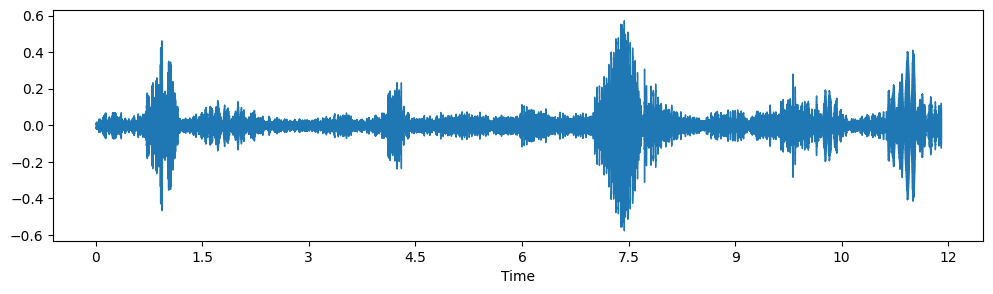

In [19]:
n = noise(data) # noise injected data
plt.figure(figsize=(12,3))
librosa.display.waveshow(y=n , sr = sampling_rate)
Audio(n , rate = sampling_rate)

Time Stretching

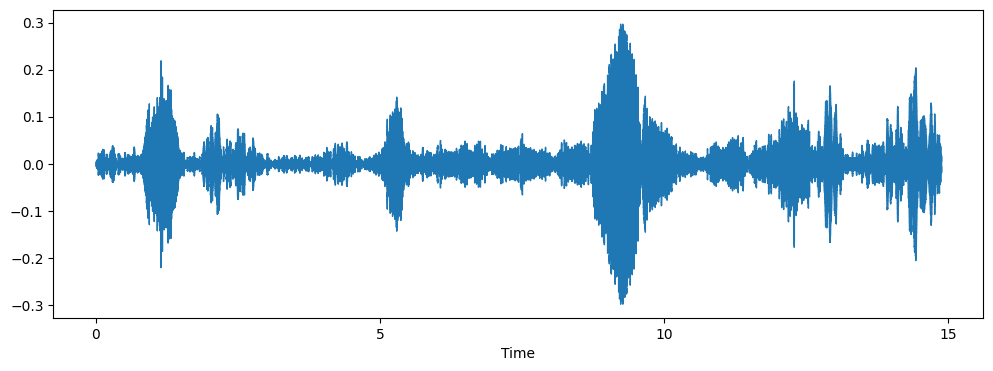

In [20]:
t_s = librosa.effects.time_stretch(data , rate = 0.8)


plt.figure(figsize=(12, 4))

librosa.display.waveshow(y=t_s, sr=sampling_rate)

Audio(t_s, rate=sampling_rate)

Time shifting

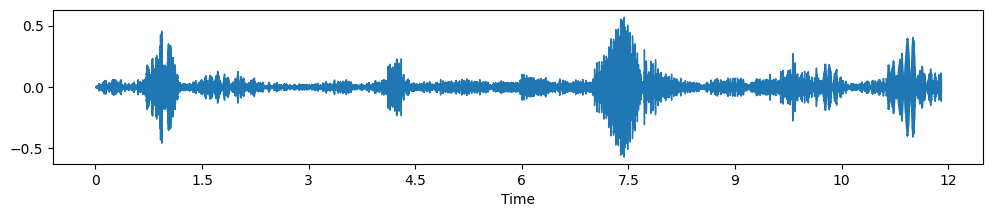

In [21]:
t_sh = time_shift(data)
plt.figure(figsize=(12,2))
librosa.display.waveshow(data , sr = sampling_rate)

Audio(t_sh , rate = sampling_rate)

Feature extraction

In [22]:
def extract_features(data):
    result = np.array([])

    mfcc = np.mean(librosa.feature.mfcc(y=data).T, axis=0)
    result = np.hstack((result, mfcc))

    mel = np.mean(librosa.feature.melspectrogram(y=data).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
#     data, sample_rate = librosa.load(path, duration=2, offset=0.6, sr=8025)
    
    res1 = extract_features(data)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))
    
    stretched_data = librosa.effects.time_stretch(data , rate = 0.8)
    stretched_pitch_data = librosa.effects.pitch_shift(y=data ,sr=sampling_rate ,  n_steps = 0.7)
    r3 = extract_features(stretched_pitch_data)
    result = np.vstack((result,r3))
    
    return result

In [23]:
X, Y = [], []
print("Feature processing...")
for path, label, ind in zip(data_df.path, data_df.label, range(data_df.path.shape[0])):
    features = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in features:
        X.append(ele)
        Y.append(label)
print(f"{data_df.path.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
0 samples has been processed...
210 samples has been processed...
Done.


In [24]:
X1, Y1 = [], []
print("Feature processing...")
for path, label, ind in zip(df.path, df.label, range(df.path.shape[0])):
    feature = get_features(path)
    if ind % 500 == 0:
        print(f"{ind} samples has been processed...")
    for ele in feature:
        X1.append(ele)
        Y1.append(label)
print(f"{df.path.shape[0]} samples has been processed...")
print("Done.")

Feature processing...
0 samples has been processed...
67 samples has been processed...
Done.


In [25]:
len(X1), len(Y1) , df.path.shape

(201, 201, (67,))

In [26]:
len(X), len(Y) , data_df.path.shape

(630, 630, (210,))

In [27]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

0           1           2          3          4          5  \
0 -399.396820  156.422974  -22.777292  47.427311  -0.903556  14.632540   
1 -302.190899   58.678243   28.119227  18.428056  12.694967   4.453030   
2 -430.457245  152.773239  -21.317472  47.143337  -3.144616  13.325185   
3 -182.851913   92.332024 -102.969170  44.905663 -36.823997  14.028777   
4  -72.861790   13.221176  -40.144291   3.200494   0.259048 -11.522743   

           6          7          8          9  ...           139  \
0 -16.140043   4.509114 -16.645725 -13.185211  ...  2.081896e-08   
1  -3.017208  -5.568722  -8.970198  -9.715638  ...  6.830227e-04   
2 -20.213440   4.232977 -21.086056  -6.800534  ...  4.354359e-08   
3 -22.255232  22.882381 -12.143926   1.910378  ...  1.655940e-06   
4  -1.206356   6.426730  -1.448397  -1.187036  ...  5.719904e-02   

            140           141           142           143           144  \
0  1.848406e-08  1.683437e-08  1.561240e-08  1.469971e-08  1.403032e-08   
1  6.890540e-04  6.822688e-04  6.964424e-04  6.629528e-04  6.825723e-04   
2  3.754339e-08  3.899499e-08  3.788188e-08  3.894333e-08  4.351369e-08   
3  1.422346e-06  1.258129e-06  1.137082e-06  1.046754e-06  9.801167e-07   
4  5.522152e-02  5.489156e-02  5.886080e-02  5.890447e-02  5.892393e-02   

            145           146           147  labels  
0  1.354037e-08  1.321276e-08  1.301347e-08       0  
1  6.635319e-04  6.858788e-04  6.780521e-04       0  
2  4.802816e-08  5.259892e-08  4.275311e-08       0  
3  9.312701e-07  8.982553e-07  8.783225e-07       0  
4  5.632957e-02  5.344367e-02  5.564741e-02       0  

[5 rows x 149 columns]

In [28]:
Feat = pd.DataFrame(X1)
Feat['labels'] = Y1
Feat.to_csv('feat.csv' ,index=False)
Feat.head()

0           1          2          3          4          5  \
0 -247.506149  127.433769 -66.876656   3.926387  -9.934386  54.608887   
1 -166.120582   51.416784 -27.152961 -21.023585  13.044473  22.703858   
2 -277.414917  117.544952 -63.108208   3.456516   0.216757  51.235710   
3 -368.504700  143.209732 -26.510002  44.693207 -13.543907  20.187065   
4 -233.222429   30.632220  14.735423  10.707533   8.181209   2.150653   

           6          7          8          9  ...           139  \
0 -36.716030  30.720791   7.437047  16.242620  ...  1.589418e-05   
1  -7.704463   9.613043  15.256886  15.015028  ...  4.919384e-03   
2 -36.184166  37.798813   3.978221  22.483747  ...  1.604508e-05   
3 -14.725286   9.615998  -7.470238  -3.542694  ...  3.861419e-09   
4  -0.112598   0.316537  -1.444234  -3.123666  ...  4.825749e-03   

            140           141           142           143           144  \
0  1.462617e-05  1.371922e-05  1.303945e-05  1.252955e-05  1.215911e-05   
1  4.626052e-03  4.887340e-03  4.879289e-03  5.181400e-03  5.026473e-03   
2  1.398710e-05  1.260150e-05  1.159632e-05  1.085908e-05  1.034506e-05   
3  3.414190e-09  3.094361e-09  2.855107e-09  2.674801e-09  2.541351e-09   
4  4.848936e-03  4.834362e-03  4.754158e-03  4.783292e-03  4.657553e-03   

            145           146           147  labels  
0  1.188824e-05  1.171066e-05  1.160099e-05       0  
1  4.664511e-03  4.750339e-03  4.992127e-03       0  
2  1.002906e-05  7.999451e-06  3.180916e-06       0  
3  2.443096e-09  2.376864e-09  2.336547e-09       0  
4  4.857650e-03  4.836510e-03  4.960195e-03       0  

[5 rows x 149 columns]

Data Preparation

In [29]:
X = Features.iloc[: ,:-1].values 
Y = Features['labels'].values

In [30]:
X1 = Feat.iloc[: ,:-1].values 
Y1 = Feat['labels'].values

In [31]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()



In [32]:
Y1_str = [str(item) for item in Y1]
Y1_encod= encoder.fit_transform(np.array(Y1_str).reshape(-1,1)).toarray()



In [33]:
x_test=X1 
y_test=Y1_encod

In [34]:
x_train=X
y_train=Y

In [35]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(X)
x_test_s= scaler.fit_transform(x_test)


CNN

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Convolutional Layer
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu',
                 input_shape=(x_train.shape[1], 1)))

# Batch Normalization (Optional)
model.add(BatchNormalization())

# Max Pooling Layer
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Dropout (Optional)
model.add(Dropout(0.5))

# Flatten the input
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Batch Normalization (Optional)
model.add(BatchNormalization())

# Dropout (Optional)
model.add(Dropout(0.5))

# Another Fully Connected Layer
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()




/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 148, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 74, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,424,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432,226 (9.28 MB)

 Trainable params: 2,431,458 (9.28 MB)

 Non-trainable params: 768 (3.00 KB)

In [37]:
history = model.fit(x_train_s , y_train  , epochs = 30 , validation_data =(x_test_s,y_test))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7850 - loss: 0.5307 - val_accuracy: 0.7065 - val_loss: 0.5216
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8859 - loss: 0.3254 - val_accuracy: 0.6617 - val_loss: 0.5554
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9124 - loss: 0.2509 - val_accuracy: 0.6119 - val_loss: 0.5735
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9031 - loss: 0.1937 - val_accuracy: 0.5920 - val_loss: 0.5838
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9210 - loss: 0.1900 - val_accuracy: 0.5871 - val_loss: 0.5863
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9385 - loss: 0.1490 - val_accuracy: 0.5871 - val_loss: 0.6053
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9636 - loss: 0.1051 - val_accuracy: 0.5871 - val_loss: 0.6135
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9647 - loss: 0.1034 - val_accuracy: 0.5871 - v

In [38]:
print("Accuracy of the model on the test data : " , model.evaluate(x_test_s,y_test)[1]*100,'%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8762 - loss: 0.4211 
Accuracy of the model on the test data :  85.57214140892029 %


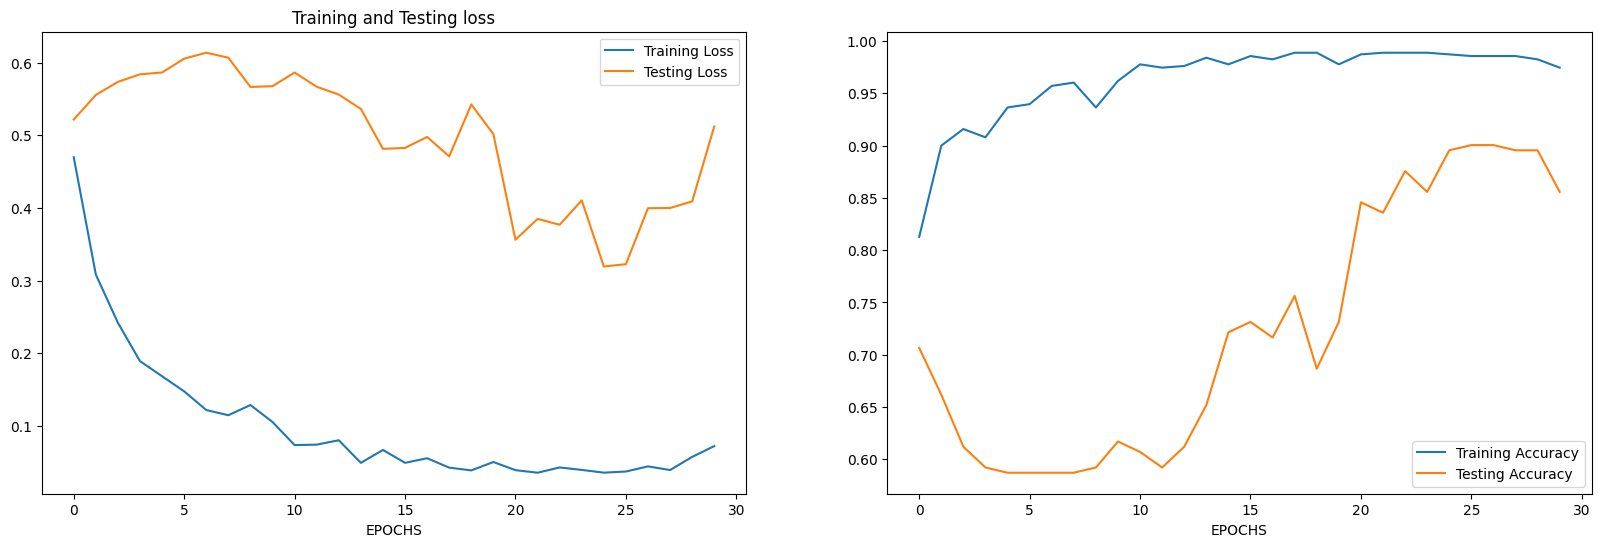

In [39]:
epochs = [i for i in range(30)] # as 30 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

In [40]:
pred_test = model.predict(x_test_s)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [41]:
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])
pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(20)

Predicted Labels Actual Labels
0                 0             0
1                 0             0
2                 0             0
3                 0             0
4                 0             0
5                 0             0
6                 1             1
7                 1             1
8                 1             1
9                 1             1
10                0             1
11                1             1
12                1             1
13                1             1
14                1             1
15                0             0
16                0             0
17                0             0
18                1             1
19                1             1

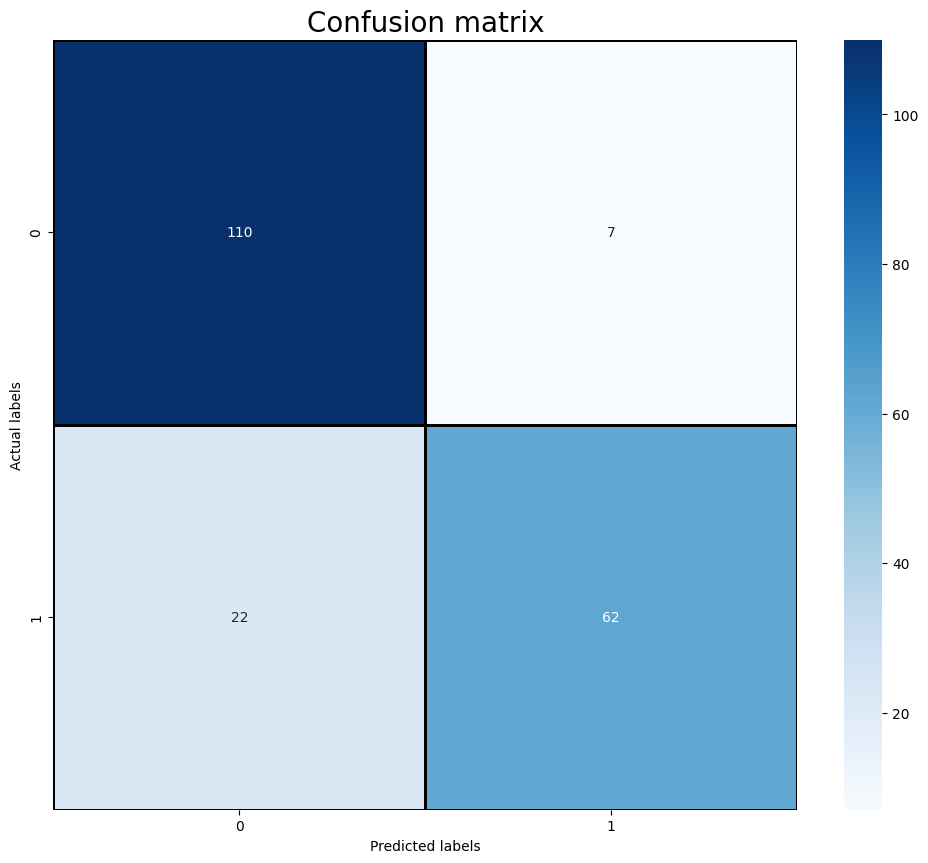

In [42]:
# Predict the values from the test set
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()